<a href="https://colab.research.google.com/github/ardalanebrahimi/EDU/blob/master/FUZZY%20Laundry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
class Quantity:
  """Enum representing a quantity (either laundry or powder)."""
  XSMALL #= "خیلی کم"
  SMALL# = "کم"
  MEDIUM #= "متوسط"
  LARGE #= "زیاد"
  XLARGE #= "خیلی زیاد"


class Level:
  """Enum representing a level or a custom degree (i.e. level of dirt)."""
  VERYLOW# = "خیلی کم"
  LOW #= "کم"
  MEDIUM #= "متوسط"
  HIGH #= "زیاد"
  VERYHIGH #= "خیلی زیاد"


def fuzzify_laundry(value):
  """Encodes the laundry weight to it's fuzzy description."""
  if value < 1.0:
    return Quantity.XSMALL
  elif value < 2.5:
    return Quantity.SMALL
  elif value < 4.5:
    return Quantity.MEDIUM
  elif value < 6:
    return Quantity.LARGE
  else:
    return Quantity.XLARGE


def fuzzify_dirty(value):
  """Encodes the dirt level to it's fuzzy description."""
  if value < 20.0:
    return Level.VERYLOW
  elif value < 40.0:
    return Level.LOW
  elif value < 60.0:
    return Level.MEDIUM
  elif value < 80.0:
    return Level.HIGH
  else:
    return Level.VERYHIGH


def defuzzify(value):
  """Decodes the powder amount fuzzy description to weight in grams."""
  if value == Quantity.XSMALL:
    return 40.0
  elif value == Quantity.SMALL:
    return 80.0
  elif value == Quantity.MEDIUM:
    return 120.0
  elif value == Quantity.LARGE:
    return 160.0
  else:
    return 200.0

In [50]:
import json


def compute_fuzzy_powder_amount(laundry_amount_fuzzy, dirt_level_fuzzy):
  """Computes the fuzzy output (powder amount) based on the fuzzy input params
     (laundry amount and dirt level)."""

  expert_rule_map = {
     (Quantity.XSMALL, Level.VERYLOW): Quantity.XSMALL,
     (Quantity.XSMALL, Level.LOW): Quantity.XSMALL,
     (Quantity.XSMALL, Level.MEDIUM): Quantity.XSMALL,
     (Quantity.XSMALL, Level.HIGH): Quantity.XSMALL,
     (Quantity.XSMALL, Level.VERYHIGH): Quantity.XSMALL,
      
     (Quantity.SMALL, Level.VERYLOW): Quantity.XSMALL,
     (Quantity.SMALL, Level.LOW): Quantity.XSMALL,
     (Quantity.SMALL, Level.MEDIUM): Quantity.SMALL,
     (Quantity.SMALL, Level.HIGH): Quantity.SMALL,
     (Quantity.SMALL, Level.VERYHIGH): Quantity.SMALL,
      
     (Quantity.MEDIUM, Level.VERYLOW): Quantity.XSMALL,
     (Quantity.MEDIUM, Level.LOW): Quantity.SMALL,
     (Quantity.MEDIUM, Level.MEDIUM): Quantity.SMALL,
     (Quantity.MEDIUM, Level.HIGH): Quantity.MEDIUM,
     (Quantity.MEDIUM, Level.VERYHIGH): Quantity.MEDIUM,
      
     (Quantity.LARGE, Level.VERYLOW): Quantity.XSMALL,
     (Quantity.LARGE, Level.LOW): Quantity.SMALL,
     (Quantity.LARGE, Level.MEDIUM): Quantity.MEDIUM,
     (Quantity.LARGE, Level.HIGH): Quantity.LARGE,
     (Quantity.LARGE, Level.VERYHIGH): Quantity.LARGE,
      
     (Quantity.XLARGE, Level.VERYLOW): Quantity.XSMALL,
     (Quantity.XLARGE, Level.LOW): Quantity.SMALL,
     (Quantity.XLARGE, Level.MEDIUM): Quantity.MEDIUM,
     (Quantity.XLARGE, Level.HIGH): Quantity.LARGE,
     (Quantity.XLARGE, Level.VERYHIGH): Quantity.XLARGE}
  """Maps the expert rules as:
     (laundry_amount_fuzzy, dirt_level_fuzzy) -> powder_amount_fuzzy"""

  fuzzy_input_parameters = (laundry_amount_fuzzy, dirt_level_fuzzy)
  fuzzy_output = expert_rule_map.get(fuzzy_input_parameters, None)

  if fuzzy_output is None:
    raise Exception(
        "Case not covered for (laundry_amount = %s, dirt_level = %s)" %
        (laundry_amount_fuzzy, dirt_level_fuzzy))
  else:
    return fuzzy_output


def compute_washing_parameters(laundry_weight_kg, dirt_level):
  """Computes required washing parameters based on provided sensor and user
     input (all inputs are numerical values)."""
  if laundry_weight_kg < 0.0 or laundry_weight_kg > 7.0:
    raise Exception("Invalid value for laundry weight: %lf" % laundry_weight_kg)

  if dirt_level < 1.0 or dirt_level > 100.0:
    raise Exception("Invalid value for dirt level: %lf" % dirt_level)

  # Encode numerical to fuzzy.
  laundry_amount_fuzzy = fuzzify_laundry(laundry_weight_kg)
  dirt_level_fuzzy = fuzzify_dirty(dirt_level)

  # Apply the expert rules.
  powder_amount_fuzzy = compute_fuzzy_powder_amount(laundry_amount_fuzzy,
                                                    dirt_level_fuzzy)

  # Decode the fuzzy result to numerical amount.
  powder_amount_grams = defuzzify(powder_amount_fuzzy)

  return {"powder_amount_grams": powder_amount_grams}


if __name__ == "__main__":
  laundry_weight_kg = float(input("وزن لباس (kg) [0-7]: "))
  dirt_level = float(input("میزان آلودگی-درصد:"))
  washing_parameters = compute_washing_parameters(laundry_weight_kg, dirt_level)
  print(json.dumps(washing_parameters, indent=2))

وزن لباس (kg) [0-7]: 5
میزان آلودگی-درصد:60
{
  "powder_amount_grams": 160.0
}


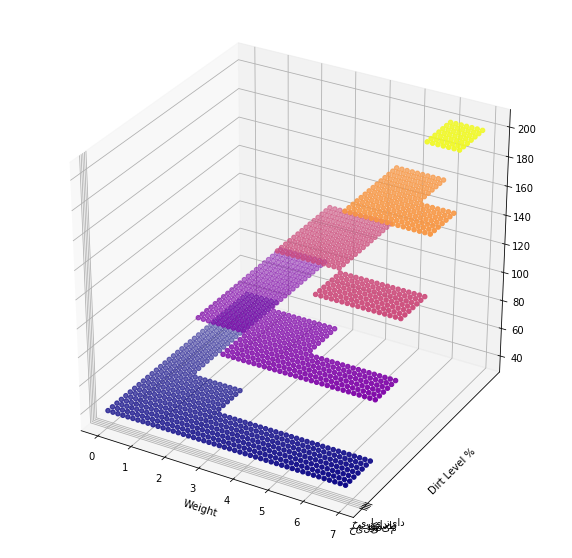

In [61]:

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.figure.set_size_inches(10, 10)
plt.xlabel('Weight')
plt.ylabel('Dirt Level %')
#plt.zlabel('Powder')
N=5
ind = np.arange(N)
plt.yticks(ind, (Level.VERYLOW,Level.LOW,Level.MEDIUM,Level.HIGH,Level.VERYHIGH))



zline = []
xline = []
yline = []

for laundry_weight_kg in frange(0.0, 7.0, 0.15):
  for dirt_level in frange(1.0,100.0, 3.0):
    washing_params = compute_washing_parameters(laundry_weight_kg, dirt_level)
    powder_amount_grams = washing_params["powder_amount_grams"]
    zline.append(powder_amount_grams)
    xline.append(laundry_weight_kg)
    yline.append(dirt_level)
    
ax.scatter3D(xline, yline, zline,  c=zline, cmap=cm.plasma);